# Homework 2
### Creating a Machine Learning Model for Predicting Housing Prices

The purpose of this model is to conceive, fine-tune, and implement a machine learning model that predicts housing prices using housing price data from Kaggle. The dataset at use here is the House Data: Advanced Regression competition dataset.

This notebook is organized into several sections. In the first section, I read in, explore, clean, and visualize the Housing Price data. I also endeavor to deal with missing data in different ways. Next, I examine features of the data to select effective parameters and features for prediction. I then test several models and select which one I see to be the best at predicting prices. For reference, I will be using a model's Root Mean Squared Error (RMSE) as the main indicator of model accuracy. Lastly, I implement the most accurate model, and then conclude.

### Accreditation:

I credit the page ["Stacked Regressions:..."](https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard) on the Kaggle Kernels for ideas with data cleaning, model selection, and hyperparameter tuning.

I also thank [Nelson Griffiths](https://github.com/ngriffiths13) for advice on getting started, help working through tricky lines of code, and no small amount of motivation. 

In [2]:
#Basic Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy.stats as stats
from numpy.polynomial.polynomial import polyfit
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder, RobustScaler
import time

#SkLearn/Other Machine Learning Packages
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline, make_pipeline

## Reading In, Exploring Data

The first thing to do is import the data. I will also add code that saves the test set ID numbers in order to submit my predictions. After this, we'll start exploring the data.

In [3]:
train_df = pd.read_csv("https://raw.githubusercontent.com/SunnyMarkLiu/Kaggle-House-Prices/master/data/train.csv")
test_df = pd.read_csv("https://raw.githubusercontent.com/SunnyMarkLiu/Kaggle-House-Prices/master/data/train.csv")
test_ID = test_df.Id
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
train_df.shape[0]

1460

In [5]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Yippee! Now that the data has been read in correctly, I'll take some time to explore and visualize the data. I would like to know which variates in the data are correlated with the actual Sale Price so that I can more accurately predict the sale prices. Also, I want to investigate a select few of the variables for skew, missing data, and other things.

The first thing I'd like to do is visualize a few of the relationships in the data; specifically, I'll just begin with a chart that shows which variables are most correlated with the outcome variable. For simplicity's sake, a simple bar chart will suffice for this. For this chart, the vertical axis will be Pearson correlation values with the Sale Price variable, and selected variables are arranged on the horizontal axis in order of their correlation coefficients with the outcome.

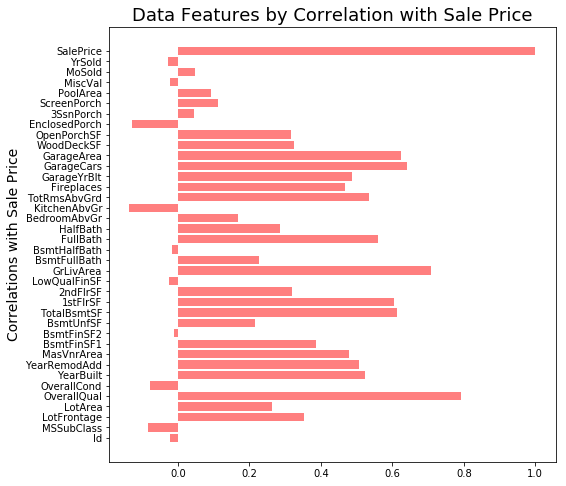

In [6]:
#Creates new Dataset with Correlation Values
corr_train = train_df.corr()
corr_train = corr_train['SalePrice']
corr_train = corr_train.reset_index()
corr_train.columns = ['Covariate', 'Corr_SalePrice']

#Bar Chart Code
y_pos = np.arange(len(corr_train['Corr_SalePrice']))
f, ax = plt.subplots(figsize=(8,8))
plt.barh(y_pos, corr_train['Corr_SalePrice'], align='center', alpha=0.5, color='red')
plt.yticks(y_pos, corr_train['Covariate'], fontsize = 10)
plt.ylabel('Correlations with Sale Price', fontsize = 14)
plt.title('Data Features by Correlation with Sale Price', fontsize = 18)
plt.show()

The chart I have rendered shows me what variables are most likely to be good predictors of Sale Price. Though this appears to be a crude way to select predictors, and it shows what we might expect anyway. However, this chart shows that variables like "Overall Quality", "Above Ground Living Area", Garage-related variables, square-footage related variables, bathroom-related variables, and the "Fireplace" variable are likely to be good predictors of Sale Price.

I'll now examine some relations of certain variables with the Sale Price variable. 

In [7]:
#Function that spits out Scatter Plots with Lines of Best Fit
def scatter_w_SalePr(x):
    b, m = polyfit(train_df[x], train_df['SalePrice'], 1)
    f, ax = plt.subplots(figsize=(9,5))
    plt.plot(train_df[x], train_df['SalePrice'], '.')
    plt.plot(train_df[x], b + m * train_df[x], '-')
    plt.title('Scatter Plot of Sale Price with Selected Variable')
    plt.ylabel('Sale Price in USD')
    plt.show()

This will save a bit of time looking at the distribution of variables compared to Sale Price. For now, I'll look at First Floor Square Footage, Above Ground Living Area, and the Garage-related variables:

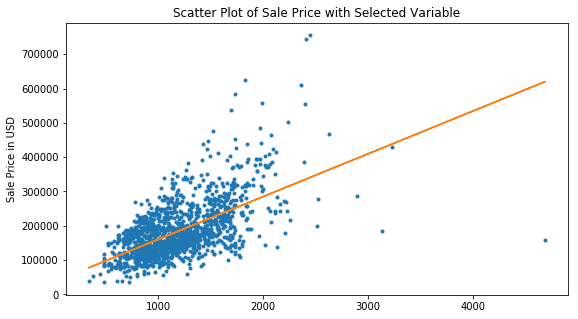

In [8]:
scatter_w_SalePr('1stFlrSF')

At least one possible outlier may be biasing this estimate. Normally, I would deal with these in a kinder manner, but I'm going to just drop that value. The purpose of this exercise is to build a model with generalizability, and this is actually helped by excluding information on houses with highly uncommon sizes.

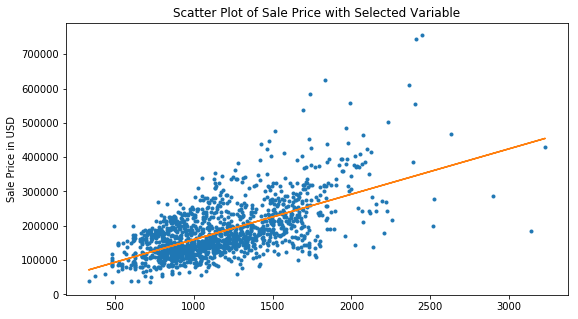

In [9]:
train_df = train_df.drop(train_df[(train_df['1stFlrSF']>4500)].index)
scatter_w_SalePr('1stFlrSF')

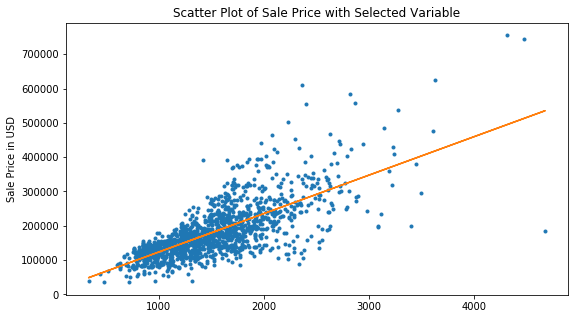

In [10]:
scatter_w_SalePr('GrLivArea')

There are likewise some possible outliers here. The code below gets rid of them:

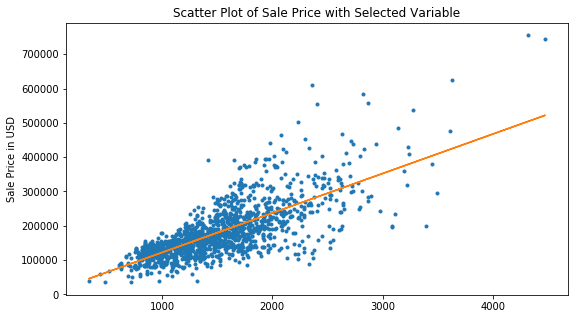

In [11]:
train_df = train_df.drop(train_df[(train_df['GrLivArea']>4500) & (train_df['SalePrice']<250000)].index)
scatter_w_SalePr('GrLivArea')

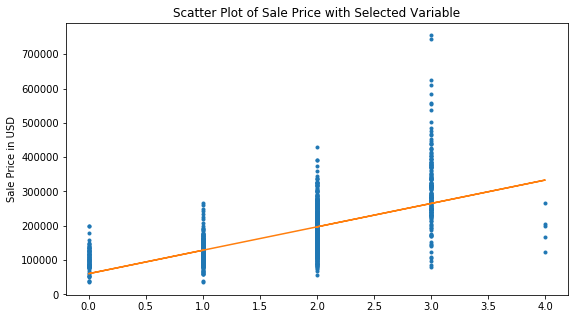

In [12]:
scatter_w_SalePr('GarageCars')

It looks like this variable might actually have a categorical relationship with Sale Price. That is, its different values might have a relationship with Sale Price values that is not necessarily "ordinal", or order-specific. Let's examine this:

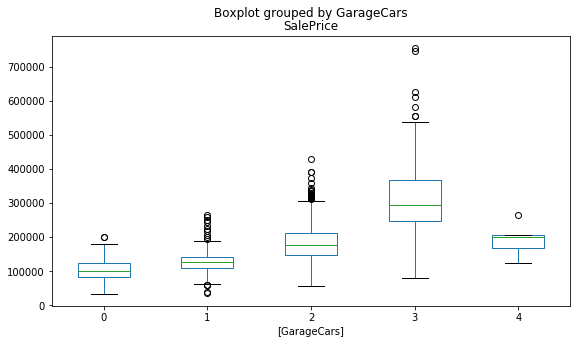

In [13]:
#Do a Box Plot!
train_df.boxplot(column=['SalePrice'], by=['GarageCars'], fontsize=10, 
                 grid=False, figsize=(9, 5))

Later on, I'll probably control for this variable in a categorical fashion. I'll probably do the same for Year Sold, Month Sold, House Condition, and other variables that are best interpreted in a categorical manner.

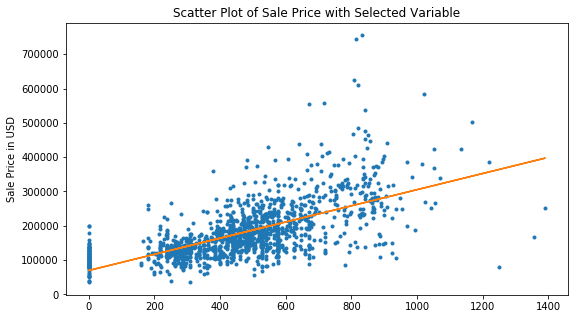

In [14]:
scatter_w_SalePr('GarageArea')

Now I'll examine a distribution of the Sale Price variable. It may be the case that this variable has some significant skew.

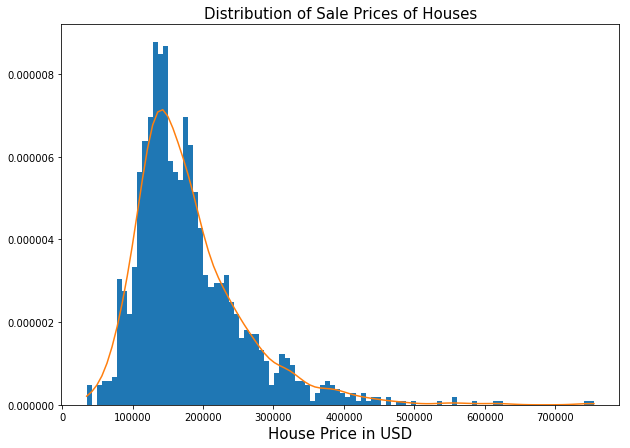

In [15]:
saleprice = train_df['SalePrice']
density = stats.gaussian_kde(saleprice)
f, ax = plt.subplots(figsize=(10,7))
n, x, _ = plt.hist(saleprice, bins=100, density=True) 
plt.plot(x, density(x))
plt.title('Distribution of Sale Prices of Houses', fontsize = 15)
plt.xlabel('House Price in USD', fontsize = 15)
plt.show()

This is a bit of a problem. I am trying to use Linear Regression to predict this variable, but this calculation doesn't work well if the target variable is not normally-distributed. 

The best way I know to deal with this problem is by instead predicting the log-transformation of this variable. First, I'm going to see if the log-transformation of the variable appears more normally-distributed.

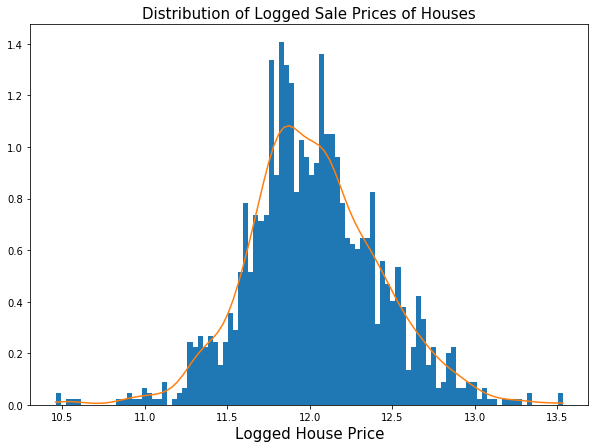

In [16]:
#Generating Log Transformation
train_df['LogSP'] = np.log1p(train_df.SalePrice)

#Re-doing the Graph
saleprice = train_df['LogSP']
density = stats.gaussian_kde(saleprice)
f, ax = plt.subplots(figsize=(10,7))
n, x, _ = plt.hist(saleprice, bins=100, density=True) 
plt.plot(x, density(x))
plt.title('Distribution of Logged Sale Prices of Houses', fontsize = 15)
plt.xlabel('Logged House Price', fontsize = 15)
plt.show()

That looks much better. This variable looks approximately normally-distributed, which will be a big help when I get to making the predictions using a regression model. For the remainder of this project, I'll actually be predicting the log-transformation of the Sale Price variable. I'll make sure to restore the prediction amounts to dollars when I'm done.

## Data Cleaning

In this section, I go through relevant steps for cleaning the data. I'll do a general check for missing values and either fill them in with appropriate information, or delete the observations related to them as necessary.

Crucially, this will require doing any data transformations to both the training and the testing datasets together. This will only be done for variable transformations (doing log-transformations of variables) and for feature engineering (like making new variables from existing data). After this, I'll effectively split the datasets up again before I begin the train-test-split analysis, preparatory to testing the prediction on the testing dataset.

In [17]:
#Setting Target Variable, Combining Datasets
n_train = train_df.shape[0]
n_test = test_df.shape[0]
y_train = train_df.LogSP.values
train_df = train_df.drop('LogSP', axis=1)
full_df = pd.concat((train_df, test_df)).reset_index(drop=True)
full_df.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(full_df.shape))

all_data size is : (2918, 80)


With the following code, I display the number of missing values in for a variable by observation count. The data description file tells me that the combined dataset has 2918 observations, so I'll consider this when looking at the numbers.

In [18]:
full_df.isna().sum().sort_values(ascending=False)

PoolQC           2905
MiscFeature      2810
Alley            2736
Fence            2356
FireplaceQu      1380
LotFrontage       518
GarageCond        162
GarageType        162
GarageYrBlt       162
GarageFinish      162
GarageQual        162
BsmtExposure       76
BsmtFinType2       76
BsmtCond           74
BsmtQual           74
BsmtFinType1       74
MasVnrArea         16
MasVnrType         16
Electrical          2
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
                 ... 
GarageCars          0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
EnclosedPorch       0
BsmtFinSF2          0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
TotRmsAbvGrd        0
KitchenQual         0
KitchenAbv

Here are some notes about missing data in terms of variables:

The Pool Quality variable is missing in most observations in the list. It happens to be relatively rare to have a pool at all, let alone to have a pool that has demonstrable differences in quality from other pools.

The Miscelanneous Feature variable is likewise missing for most of the observations. These include having an elevator, a second garage, a shed, or a tennis court. Again, I don't expect these factors to be helpful in a model that I am trying to make generalizeable to a wide range of houses.

From the data description shown above, it also looked like the Utilities variable was the same value for almost each observation. I'll check this real quick:

In [19]:
full_df['Utilities'].value_counts()

AllPub    2916
NoSeWa       2
Name: Utilities, dtype: int64

Since all the data is virtually the same regarding Utilties, I'll drop this variable as well.

In [20]:
#Drop three Variables
full_df = full_df.drop(['PoolQC', 'MiscFeature', 'Utilities'], axis=1)

## Imputation (Fixing Missing Data)

In this section, I describe the steps I take to deal with missing data. There is missing data in several of the variables that I will need for the model. I will look at all of these and see what will be the best option for filling in the missing value.

It looks like the basement and garage variables are all missing in about the same frequencies. From the documentation, it looks like the missing value just means that a house doesn't have a basement or a garage. I still want the analysis to see these observations, so I'll fill these in with "None" so that they still get calculated in categorical analysis.

In [21]:
missing_vars = ['Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', "MasVnrType", 'MSSubClass']
#Loops over missing categorical variables and fills them in with "None" if they equal "0"
for col in missing_vars:
    full_df[col] = full_df[col].fillna('None')

There are also some missing values for numerical variables. I have identified all such variables in the code below. Each one's missing value (as per the data documentation) similarly signifies that the feature does not exist in the house, but it should be filled in with a "0" instead of a "None". The code below utilizes a loop to make this change.

In [22]:
missing_numbers = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea', 'GarageCars', 'GarageArea', 'GarageYrBlt']
#Loop fills over missing values in numerical data with zeros
for col in missing_numbers:
    full_df[col] = full_df[col].fillna(0)

There is one other missing categorical variable that can't really be filled in with zeros (it's a feature which is very unlikely to not exist at all). This feature is the Electrical Setup Type variable. I'll just fill it in with the most common observation for the particular neighborhood (I imagine homes in the same neighborhood are likely to have the same wiring system?).

In [23]:
full_df['Electrical'] = full_df.groupby("Neighborhood")['Electrical'].fillna(full_df[col].mode()[0])

Now I'm going to deal with the tricky Lot Frontage variable. This variable's value is equal to the linear feet of street connected to the property and it's missing for a pesky 518 of the observations in the combined dataset. I'll likewise fill this in with the variable's mean, but I'll impute the mean for the house's neighborhood. This way, each imputed value will be slightly more accurate than it would be had I just imputed the overall mean of the 2,918 observations. Furthermore, this preserves the distinction between the training and testing datasets as no data from one is being used in imputations for the other.

In [24]:
full_df["LotFrontage"] = full_df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.mean()))

In [25]:
#Check again for more missing values
full_df.isnull().any().sum()

0

## Generating New Variables/Recoding Variables

Now that all the data is as balanced as it can be, I'm going to begin some feature engineering (building some new variables). These will mostly be based on information already in the data. For example, one useful variable might be a "Full Square Footage" variable, equal to the sum of all the variables which record square footage on floors, decks, yards, and so on. This step is important because controlling for things separately that could be analyzed together (square footages of separate house elements as opposed to total square footage) may show to be needless and possibly confounding. This step will likewise help in the later steps of identifying the most important predictors of House Prices. I'll also condense a few of the numerical variables into simplified dummy variables that may make the results easier to interpret (for instance, a variable for "having a basement" or not). This section also includes "recoding" certain variables that I imagine need to be interpreted categorically rather than numerically.

In [26]:
#New Variables for Total Square Footage and Total #bathrooms
full_df['sqfootage_tot'] = full_df['TotalBsmtSF'] + full_df['1stFlrSF'] + full_df['2ndFlrSF']
full_df['bathroom_tot'] = (full_df['FullBath'] + (0.5*full_df['HalfBath']) + 
                           full_df['BsmtFullBath'] + (0.5*full_df['BsmtHalfBath']))

#Simple Dummy Variables
full_df['has_pool'] = full_df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
full_df['has_upstairs'] = full_df['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
full_df['has_garage'] = full_df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
full_df['has_bsmt'] = full_df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)

There are still a few categorical variables in the dataset that are recorded numerically. These are things like Year Sold, Month Sold, and Overall Condition. I change these into categorical variables below:

In [27]:
#Changes Condition, Zoning, Cars in Garage, and Year and Month Sold to Categorical Variables
full_df['OverallCond'] = full_df['OverallCond'].astype(str)
full_df['MSSubClass'] = full_df['MSSubClass'].apply(str)
full_df['GarageCars'] = full_df['GarageCars'].astype(str)
full_df['YrSold'] = full_df['YrSold'].astype(str)
full_df['MoSold'] = full_df['MoSold'].astype(str)

It happens that there are a number of variables recorded categorically but which are probably better to be interpreted ordinally. One example is the Fireplace Quality variable. It has distinct categorical values, but in practice they might be thought of as being on a natural scale. See the summary of this variable's values below:

In [28]:
full_df['FireplaceQu'].value_counts()

None    1380
Gd       758
TA       626
Fa        66
Ex        48
Po        40
Name: FireplaceQu, dtype: int64

(where "Gd" means "good", "TA" means "average", "Fa" means "fair", and "Po" means "poor")

Controlling for each separate category would be exhaustive, but probably unnecessary. Several variables have categorical values that can be thought of as ordinal even though they are not numeric. I have compiled a list of all such variables and use the following code to give them each labels that make sense in scales.

In [29]:
#Label Assignment for Ordinal Variables
ord_vars = ['Alley', 'BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 
            'CentralAir', 'ExterQual', 'ExterCond', 'Fence', 'FireplaceQu', 'Functional', 
            'GarageFinish', 'GarageQual', 'GarageCond', 'HeatingQC', 'KitchenQual', 'LandSlope', 
            'LotShape', 'MSSubClass', 'MoSold', 'OverallCond', 'PavedDrive', 
            'Street', 'YrSold']

for i in ord_vars:
        lbl = LabelEncoder()
        lbl.fit(list(full_df[i].values)) 
        full_df[i] = lbl.transform(list(full_df[i].values))

The last thing to do is turn all the data into numerical values. The machine learning models only work when all the data is numerical. This essentially means I'll create additional "dummy" variables for each value of the categorical variables I've generated. The code below does this action:

In [30]:
#Get dummy variables
full_df = pd.get_dummies(full_df)
#Get new shape of data
print(full_df.shape)

(2918, 226)


## Training, Fine-Tuning, and Implementing the Regression Model

In this section, I apply a few machine learning models to use on my training data to see which one does the best. I'll select the one that appears to do the best and examine it, fine-tune it, and prepare it to make predictions on the test data. This will include splitting the data back up into its individual parts, borrowing a function from the [Scikit Learn](https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html) website that will test the effectiveness of certain models, and then trying them out on the training data. Before I select and submit the one which appears to work the best, I'll write a bit about the features that the machine learned to be the best predictors of House Prices within the dataset.

In [31]:
#Splits Data back into Training and Testing
train_complete = full_df[:n_train]
test_complete = full_df[n_train:]

The following function comes from the ScikitLearn website. It plots the learning curve of a specified type of model. The learning curves show a generalized illustration of whether a tested model is underfitting (not learning well enough on the training data), overfitting (learning too much on the training data at the cost of generalizability), or fitting fairly well.

In [32]:
#SKLearn Function that Plots Learning Curves for Specified Functions
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

I also create a function that returns the scores of the models for later use.

In [33]:
def display_rmse(model, train_complete, y_train):
    scores = np.sqrt(-cross_val_score(model, train_complete, y_train, cv = 5, scoring = 'neg_mean_squared_error'))
    return scores.mean()

### Models

Here, I do a brief rundown of each of the models I've imported. I'm going to use cross validation between these models to get a better idea of which models do better than others, and which model does the best at predicting. 

Here is a list of the models I'll be trying out, and how they work:

[Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso) - Linear Model trained with L1 prior as regularizer (aka the Lasso)

[Bayesian Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.BayesianRidge.html#sklearn.linear_model.BayesianRidge) - Fits a Bayesian ridge model and optimize the regularization parameters lambda (precision of the weights) and alpha (precision of the noise). Uses L2 regularization and Bayesian Methods to make predictions.

[Elastic Net](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) - Linear regression the weights L1 and L2 regularization.

[Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) - Constructs a multitude of "decision trees" at training time and outputs the class that is the mode of the classes or mean prediction (regression) of the individual trees.

[Support Vector Regression or SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html) - This method depends on only a subset of the training data, because the function for building the model ignores training data close to the model prediction.

[Kernel Ridge Regression](https://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html) - This method combines ridge regression (least least squares with I2-norm regularization) with the kernel trick. It thus learns a linear function in the space induced by the respective kernel and the data. For non-linear kernels, this corresponds to a non-linear function in the original space

[Gradient Boosting Regressor](https://scikitlearn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html) - This method is just another decision tree boosted model. It allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function.

To keep things simple, I'll make a simple function that runs a model and returns the scores. Then I'll test each of the models and compare their results.

In [34]:
def test_model(model):
    scores = display_rmse(model, train_complete, y_train)
    print(model.__class__.__name__,": RMSE =", scores)
    plot_learning_curve(model, model.__class__.__name__, train_complete, y_train, cv = 5)
    plt.show()

ElasticNet : RMSE = 0.16171758388830626


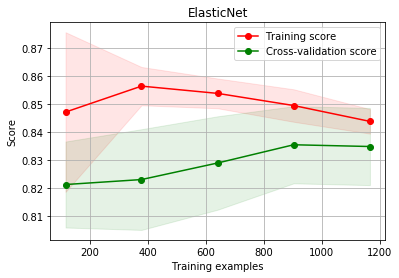

In [35]:
test_model(ElasticNet())

Lasso : RMSE = 0.16973538937497282


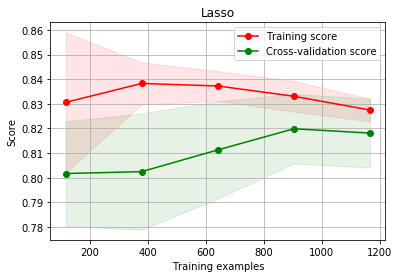

In [36]:
test_model(Lasso())

BayesianRidge : RMSE = 0.11624606750784021


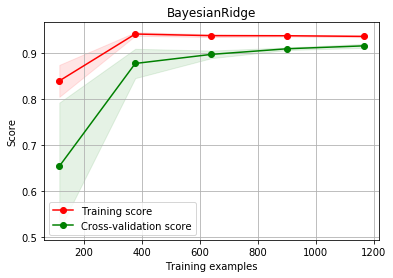

In [37]:
test_model(BayesianRidge())

RandomForestRegressor : RMSE = 0.14668955999807098


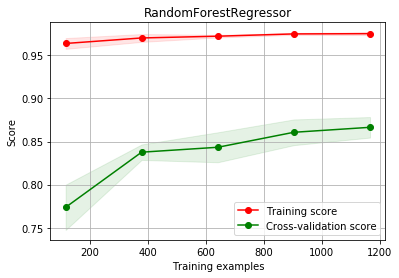

In [38]:
test_model(RandomForestRegressor())

SVR : RMSE = 0.3995427090620677


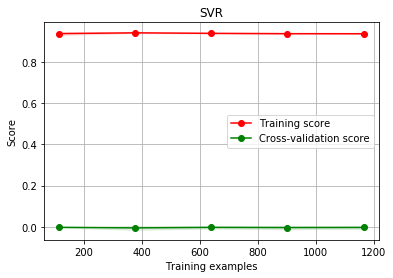

In [39]:
test_model(SVR())

KernelRidge : RMSE = 0.12207873705591563


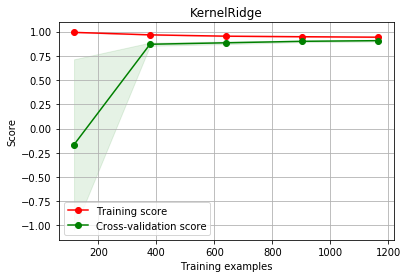

In [40]:
test_model(KernelRidge())

GradientBoostingRegressor : RMSE = 0.12096832878223718


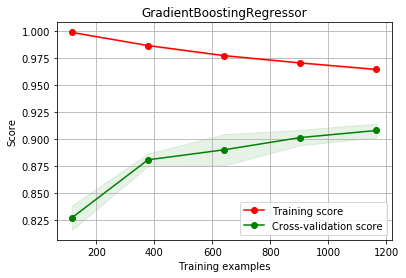

In [41]:
test_model(GradientBoostingRegressor())

### Model Evaluation

Well that was fun. Now, I'll describe these models and explain some of the rationale for picking the ones I like. 

##### SVR, and Kernel Ridge: 

These did pretty bad for various reasons. The SVR model was seriously underfitting. The way these learning curves are displayed, I am looking for the models where the curves eventually converge. SVR didn't converge at all, meaning it didn't find any relationships in the data. Bayesian and Kernel Ridge had the opposite problem: they seemed to over-fit the data. The relationships they learned were probably correct, but it overfit to the training data meaning they might not generalize to other data, especially the testing data.

##### RandomForest, Lasso, and ElasticNet

These guys all did ok. It seemed that after a time, the machine learned some important relationships as evidenced by the curves eventually converging in the later iterations of the tests. Though the score metrics for these were not the highest, I'll probably take some of these models on to the next stage for tuning and submission preparation.

##### GradientBoosting, and Bayesian Ridge

These ones look to me to have done the best. Their learning curves are at varying distances from each other, but they tend to converge near the end of the learning, meaning the machine is actually learning accurate relationships. I'll likely send on one of these models to the next stage for tuning and submission prep.

## Model Tuning

From the previous section, I saw 2 or 3 models that I believe did pretty well on the data. I'm going to work with all of these, tune them up by finding and selecting the best hyperparameters, try to train them again using a train-test-split method, and then select the one that I think to be the best to predict Sale Prices on the Test Data. I'll then submit my predictions to Kaggle.

In [48]:
#Create steps for each model pipeline
select = SelectKBest(k = 'all')
en_steps = [('Scaler', RobustScaler()), ('feature_selection', select), ('model', ElasticNet(alpha = .0005))]
las_steps = [('Scaler', RobustScaler()), ('model', Lasso(alpha = .0005))]
gb_steps = [('Scaler', RobustScaler()), ('model', GradientBoostingRegressor(alpha = .0005))]

#Pipelines...
en_pipe = Pipeline(en_steps)
las_pipe = Pipeline(las_steps)
gb_pipe = Pipeline(gb_steps)

In [49]:
#Set up parameters for each pipeline to search through
params = {'en' : {'feature_selection__k' : np.arange(10,220, 10),
                'model__l1_ratio' : np.arange(0, 1, .1),
                'model__selection' : ['cyclic', 'random']},
         'las' : {'model__max_iter' : np.arange(700, 1400, 100),
                'model__selection' : ['cyclic', 'random']},
          'gb' : {'model__learning_rate' : [1, 0.5, 0.25, 0.1, 0.05, 0.01],
                  'model__n_estimators' : np.arange(500, 3000, 200),
                  'model__max_depth' : np.linspace(1, 32, 32, endpoint=True),
                  'model__min_samples_leaf' : np.linspace(0.1, 0.5, 5, endpoint=True),
                  'model__min_samples_split' : np.linspace(0.1, 1.0, 10, endpoint=True)}
         }

The code above sets up some relevant hyperparameters that the search can look through when doing the tuning. The code below executes the search and shows the improvements in RMSE and the Learning Curve:

In [50]:
#Function for getting the best hyperparameters for each model
def tune_parameters(pipe, train_complete, y_train, params, n_iter, base_model):
    orig_score = display_rmse(base_model, train_complete, y_train)
    model = RandomizedSearchCV(pipe, param_distributions = params, n_iter = n_iter, cv = 5, scoring = 'neg_mean_squared_error')
    start_time = time.time()
    model.fit(train_complete,y_train)
    print("Best Hyperparameters for %s  \n" % (pipe.named_steps.model.__class__.__name__))
    print(model.best_params_, '\n')
    model = model.best_estimator_
    new_score = display_rmse(model, train_complete, y_train)
    print("Original RMSE: %s \n" %(orig_score))
    print("Improved RMSE: %s \n" %(new_score))
    print("NEW LEARNING CURVE:")
    plot_learning_curve(model, pipe.named_steps.model.__class__.__name__, train_complete, y_train, cv = 5)
    plt.show()
    return model

Best Hyperparameters for ElasticNet  

{'model__selection': 'random', 'model__l1_ratio': 0.7000000000000001, 'feature_selection__k': 180} 

Original RMSE: 0.16171758388830626 

Improved RMSE: 0.11264301635988713 

NEW LEARNING CURVE:


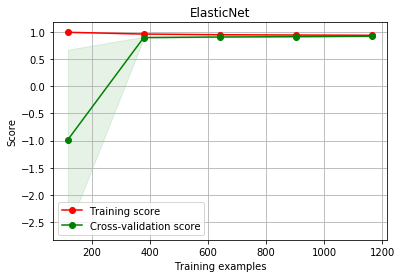

In [45]:
en_model = tune_parameters(en_pipe, train_complete, y_train, 
                           params['en'], 10, ElasticNet())

Best Hyperparameters for Lasso  

{'model__selection': 'random', 'model__max_iter': 900} 

Original RMSE: 0.16973538937497282 

Improved RMSE: 0.1129838389449214 

NEW LEARNING CURVE:


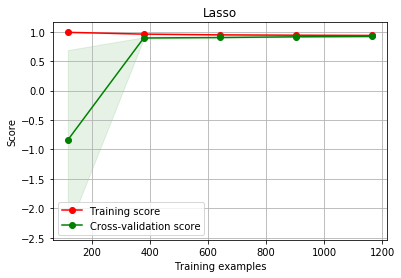

In [46]:
lasso = tune_parameters(las_pipe, train_complete, y_train, 
                        params['las'], 10, Lasso())

Best Hyperparameters for GradientBoostingRegressor  

{'model__n_estimators': 2300, 'model__min_samples_split': 1.0, 'model__min_samples_leaf': 0.1, 'model__max_depth': 3.0, 'model__learning_rate': 0.01} 

Original RMSE: 0.12107435498462278 

Improved RMSE: 0.14467606399805372 

NEW LEARNING CURVE:


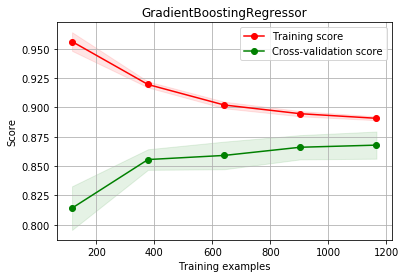

In [51]:
gradbooster = tune_parameters(gb_pipe, train_complete, y_train, 
                              params['gb'], 10, GradientBoostingRegressor())

Somehow, the Gradient Booster model's RMSE went up... However, the Lasso model appears to have improved as evidenced by its RMSE. ElasticNet appears to have done better as well, but it might be suffering from overfitting. In any case, I only want to submit one model's predictions for now so the Lasso model is fine.

Before I turn the Lasso loose on the testing data, I'd like to illustrate what it's doing. The model's fitting selected what it saw to be the most important predictors in the data. Displaying these features will give some substantive insight into what matters in the changing of house prices according to the data. It should also show us if the feature engineering step of my analysis did anything useful.

In [52]:
lasso_model = Lasso(alpha = .0005)
lasso_model.fit(train_complete, y_train)
feature_importances = pd.DataFrame(columns = ['Variable', 'Coef'])
feature_importances['Variable'] = list(train_complete)
feature_importances['Coef'] = (lasso_model.coef_)
feature_importances.sort_values(by = 'Coef', ascending = False, inplace = True)
feature_importances.head

<bound method NDFrame.head of                   Variable      Coef
83    Neighborhood_Crawfor  0.102293
99    Neighborhood_StoneBr  0.069483
149    Exterior1st_BrkFace  0.056398
8              OverallQual  0.053233
25              CentralAir  0.050421
80    Neighborhood_BrkSide  0.041805
9              OverallCond  0.041772
104        Condition1_Norm  0.039481
73       LotConfig_CulDSac  0.034745
217           SaleType_New  0.031883
93    Neighborhood_NridgHt  0.030839
183       Foundation_PConc  0.026654
224   SaleCondition_Normal  0.023571
98    Neighborhood_Somerst  0.022799
39              Fireplaces  0.022215
180       MasVnrType_Stone  0.020936
38              Functional  0.018599
119          BldgType_1Fam  0.018571
81    Neighborhood_ClearCr  0.017520
154    Exterior1st_MetalSd  0.015825
58            bathroom_tot  0.013943
209           GarageCars_3  0.012705
14               ExterCond  0.010112
30            BsmtFullBath  0.008062
33                HalfBath  0.007351
5       

Here, we see 30 variables that positively affect predicted Sale Price, and 30 that negatively affect it. It appears that some neighborhoods can get away with selling houses at higher prices, like Crawford and Stoneboork, so these must be the more affluent neighborhoods. The last variable on the list, the Zoning Type: All variable, has a coefficient of about -0.286, meaning being in an "All" type zone (as opposed to a strictly residential zone) is expected to decrease sale price. The Total Bathrooms variable I generated has the 21st highest positive coefficient in the model so that's nice. 

By now, I've cross-validated the Lasso Model, and have also run it through some Hyperparameter tuning. I'm satisfied with the model and I'm going to use the model to predict the Sales Prices from the Test data and submit those predictions to Kaggle.

In [53]:
lasso_model = lasso_model.fit(train_complete, y_train)
lasso_pred = np.expm1(lasso_model.predict(test_complete))
submission = pd.DataFrame({'Id':test_ID,'SalePrice':lasso_pred})
submission.to_csv("Final_Submission.csv",index=False)

The submission scored a meager 0.57515 on the Kaggle competition. Not super high, but I think it's above the benchmark. It's been a ride.

## Conclusion:

In the end, I'm glad to have used the actual machine learning techniques and let the computer "learn" the most important relationships in the data rather than try to use OLS regression. I'm glad to have learned this skill. This exercise gave me added appreciation for the fact that Machine Learning and Data Science are non-trivial pursuits. It takes focus and motivation to know when enough work has been done on a project.

There were some limitations to my results that were related to things I didn't do with the data as well as in the fine-tuning step. A few resources told me that skew in other variables was something I should address, but I didn't get around to addressing them. Also, the page mentioned above from the Kaggle Kernels made a case for "stacking" regression models to make their combined effects more powerful together. This was another step I didn't get around to, but it might have been slightly helpful. Despite these limitations and setbacks, I am confident in the predictions I made and am anxious to try another problem of this kind in the future.